In [62]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
datasets = load_datasets()

In [64]:
ds_name = 'cmc'
test_on_all_folds = True
test_all_ds = True

In [65]:
datasets = ex.one_hot_encode_all(datasets)

In [66]:
config = ex.config_calculation_strategy2(datasets)

In [67]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.0015,
  'batch_size': 16,
  'gamma': 0.95,
  'epochs': 50}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 6},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['3mocniej-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['1czysty-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['2delikatne-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [68]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 6},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 'balance-scale': {'nn_config': {'uni

In [69]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1)
        } 
    return classifiers

In [70]:
from experiment import dt_name_to_cols_to_encode


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from experiment import dt_name_minority_classes

def calc_mean_minority_safety5(X,y,dt_name):
    # Calculate cardinalities of safe, borderline, rare and outlier examples for each class
    result = defaultdict(int)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result[f'safe-{y[i]}'] += 1
        elif same_class_nbrs >= 2:
            result[f'borderline-{y[i]}'] += 1
        elif same_class_nbrs == 1:
            result[f'rare-{y[i]}'] += 1
        else:
            result[f'outlier-{y[i]}'] += 1
            
            
    # normalize values -> divide by number of all examples
    safety_normalized = {}
    for k, v in result.items():
        safety_normalized[k] = v / X.shape[0]
        
    print(safety_normalized)
            
    # Calculate mean minority safety
    mean_minority_safety = {}
    min_classes = dt_name_minority_classes[dt_name]
    min_classes_safety = [safety_normalized[f"safe-{min_c}"] if f"safe-{min_c}" in safety_normalized else 0 for min_c in min_classes]
    mean_minority_safety['safe'] = np.mean(min_classes_safety)
    
    return mean_minority_safety

In [72]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

cmc


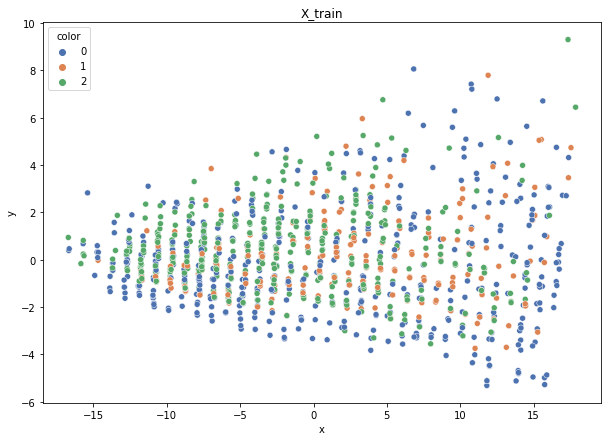

Class cardinalities: Counter({0: 503, 2: 409, 1: 266})
Weights: {0: 0.2426709552796112, 1: 0.45888530265279864, 2: 0.29844374206759033}


100%|██████████| 295/295 [00:00<00:00, 2851.27it/s]


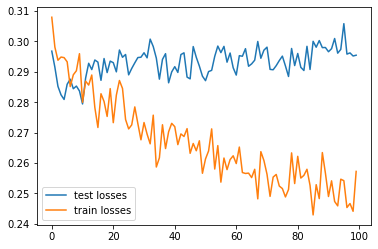

{'safe-0': 0.19212491513917176, 'borderline-0': 0.13781398506449424, 'rare-0': 0.0658520027155465, 'outlier-0': 0.031228784792939578, 'borderline-1': 0.10930074677528853, 'safe-1': 0.031228784792939578, 'rare-1': 0.05295315682281059, 'outlier-1': 0.032586558044806514, 'borderline-2': 0.17447386286490157, 'rare-2': 0.06856754921928038, 'safe-2': 0.07196198234894773, 'outlier-2': 0.031907671418873046}
{'borderline-0': 0.22606924643584522, 'rare-0': 0.09164969450101833, 'safe-0': 0.07942973523421588, 'outlier-0': 0.02987101154107264, 'safe-1': 0.028513238289205704, 'borderline-1': 0.10590631364562118, 'outlier-1': 0.04548540393754243, 'rare-1': 0.0461642905634759, 'rare-2': 0.0746775288526816, 'borderline-2': 0.1887304820095044, 'outlier-2': 0.027155465037338764, 'safe-2': 0.05634758995247793}


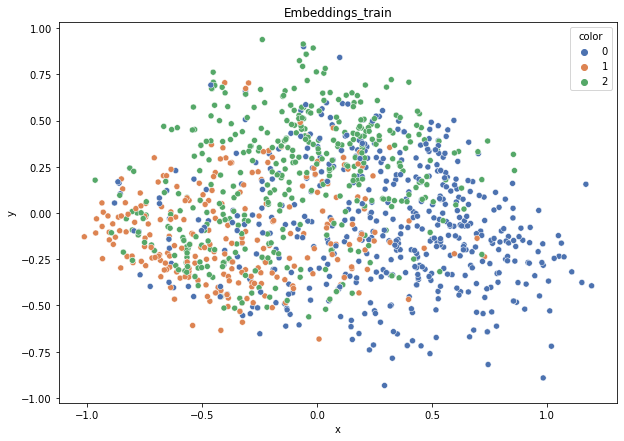

DT-f1-new-features: 0.464
DT-f1-old+new-features: 0.467
DT-f1-old-features: 0.491
DT-gmean-new-features: 0.468
DT-gmean-old+new-features: 0.471
DT-gmean-old-features: 0.503
KNN-f1-new-features: 0.431
KNN-f1-old+new-features: 0.448
KNN-f1-old-features: 0.443
KNN-gmean-new-features: 0.417
KNN-gmean-old+new-features: 0.44
KNN-gmean-old-features: 0.433
RF24-f1-new-features: 0.514
RF24-f1-old+new-features: 0.502
RF24-f1-old-features: 0.508
RF24-gmean-new-features: 0.514
RF24-gmean-old+new-features: 0.503
RF24-gmean-old-features: 0.512
dermatology


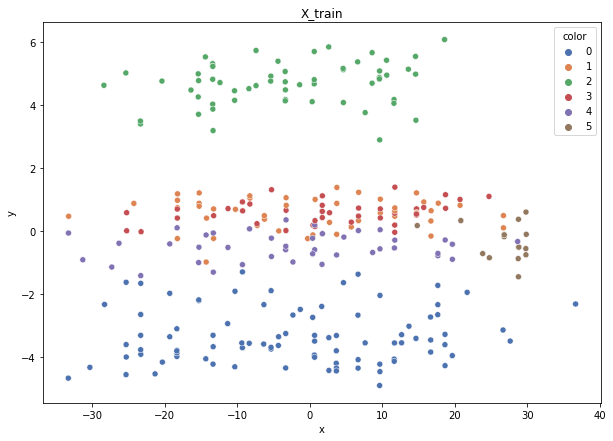

Class cardinalities: Counter({0: 89, 2: 58, 1: 49, 4: 41, 3: 40, 5: 16})
Weights: {1: 0.1269355878601628, 2: 0.10723868629565478, 0: 0.06988588545110087, 4: 0.1517035074426336, 3: 0.15549609512869944, 5: 0.3887402378217486}


100%|██████████| 73/73 [00:00<00:00, 2818.00it/s]


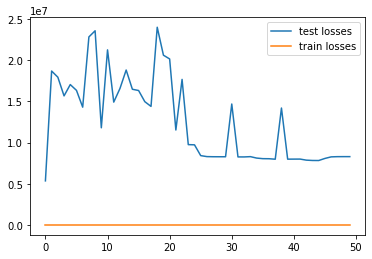

{'safe-1': 0.16120218579234974, 'safe-2': 0.19398907103825136, 'safe-0': 0.30601092896174864, 'safe-4': 0.14207650273224043, 'safe-3': 0.1284153005464481, 'safe-5': 0.0546448087431694, 'rare-2': 0.00273224043715847, 'rare-3': 0.00273224043715847, 'rare-1': 0.00273224043715847, 'outlier-3': 0.00273224043715847, 'outlier-1': 0.00273224043715847}
{'borderline-1': 0.06284153005464481, 'safe-2': 0.17486338797814208, 'safe-0': 0.23770491803278687, 'safe-1': 0.09562841530054644, 'safe-4': 0.13387978142076504, 'safe-3': 0.10655737704918032, 'borderline-5': 0.02185792349726776, 'borderline-0': 0.04371584699453552, 'borderline-3': 0.0273224043715847, 'rare-1': 0.00819672131147541, 'rare-5': 0.00546448087431694, 'outlier-0': 0.01366120218579235, 'borderline-4': 0.00819672131147541, 'rare-0': 0.01092896174863388, 'safe-5': 0.0273224043715847, 'borderline-2': 0.01639344262295082, 'outlier-2': 0.00273224043715847, 'rare-2': 0.00273224043715847}


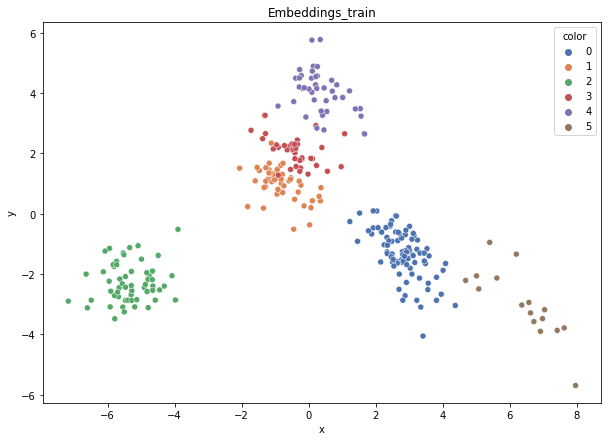

DT-f1-new-features: 0.913
DT-f1-old+new-features: 0.891
DT-f1-old-features: 0.955
DT-gmean-new-features: 0.903
DT-gmean-old+new-features: 0.885
DT-gmean-old-features: 0.955
KNN-f1-new-features: 0.925
KNN-f1-old+new-features: 0.927
KNN-f1-old-features: 0.952
KNN-gmean-new-features: 0.919
KNN-gmean-old+new-features: 0.923
KNN-gmean-old-features: 0.951
RF24-f1-new-features: 0.91
RF24-f1-old+new-features: 0.936
RF24-f1-old-features: 0.984
RF24-gmean-new-features: 0.903
RF24-gmean-old+new-features: 0.935
RF24-gmean-old-features: 0.986
hayes-roth


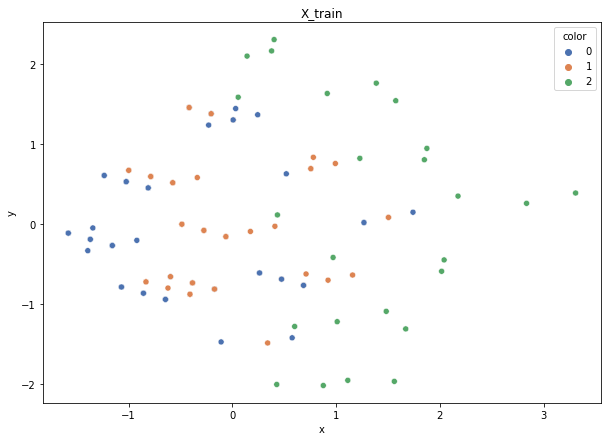

Class cardinalities: Counter({0: 52, 1: 51, 2: 25})
Weights: {0: 0.243925770040176, 1: 0.24870862827625786, 2: 0.507365601683566}


100%|██████████| 32/32 [00:00<00:00, 2568.81it/s]


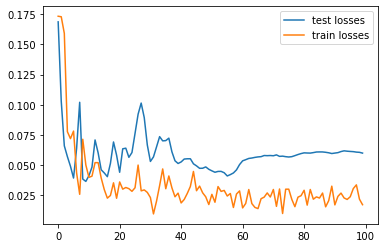

{'safe-0': 0.33125, 'borderline-1': 0.06875, 'safe-2': 0.19375, 'safe-1': 0.3125, 'borderline-0': 0.0625, 'rare-0': 0.0125, 'rare-1': 0.01875}
{'borderline-0': 0.29375, 'borderline-1': 0.3, 'safe-2': 0.125, 'safe-0': 0.10625, 'borderline-2': 0.06875, 'safe-1': 0.075, 'rare-1': 0.025, 'rare-0': 0.00625}


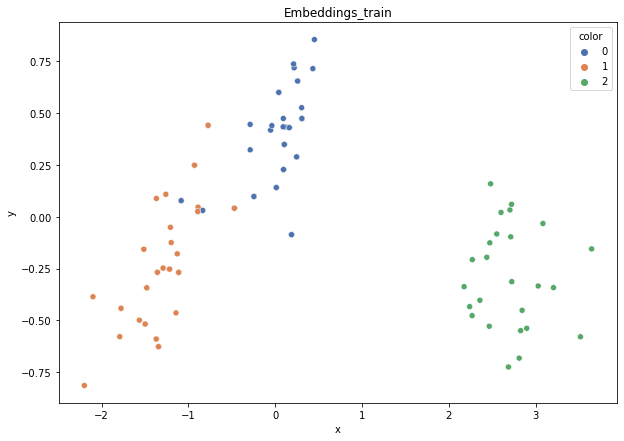

DT-f1-new-features: 0.897
DT-f1-old+new-features: 0.897
DT-f1-old-features: 0.872
DT-gmean-new-features: 0.895
DT-gmean-old+new-features: 0.895
DT-gmean-old-features: 0.867
KNN-f1-new-features: 0.897
KNN-f1-old+new-features: 0.82
KNN-f1-old-features: 0.643
KNN-gmean-new-features: 0.892
KNN-gmean-old+new-features: 0.811
KNN-gmean-old-features: 0.619
RF24-f1-new-features: 0.897
RF24-f1-old+new-features: 0.897
RF24-f1-old-features: 0.846
RF24-gmean-new-features: 0.895
RF24-gmean-old+new-features: 0.895
RF24-gmean-old-features: 0.84
new_vehicle


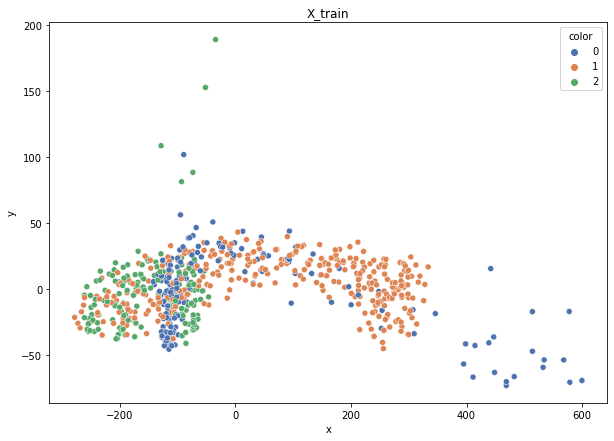

Class cardinalities: Counter({1: 343, 0: 175, 2: 159})
Weights: {2: 0.4215623617324616, 1: 0.19541812103633058, 0: 0.3830195172312079}


100%|██████████| 169/169 [00:00<00:00, 2919.72it/s]


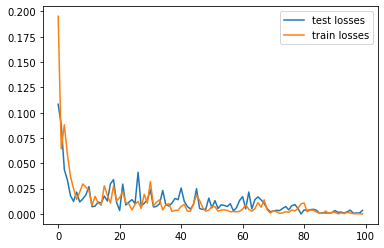

{'safe-2': 0.23522458628841608, 'safe-1': 0.5070921985815603, 'safe-0': 0.2576832151300236}
{'safe-2': 0.17375886524822695, 'safe-1': 0.4373522458628842, 'rare-0': 0.00591016548463357, 'safe-0': 0.23286052009456265, 'borderline-2': 0.05319148936170213, 'borderline-1': 0.054373522458628844, 'rare-1': 0.014184397163120567, 'borderline-0': 0.018912529550827423, 'rare-2': 0.00591016548463357, 'outlier-1': 0.001182033096926714, 'outlier-2': 0.002364066193853428}


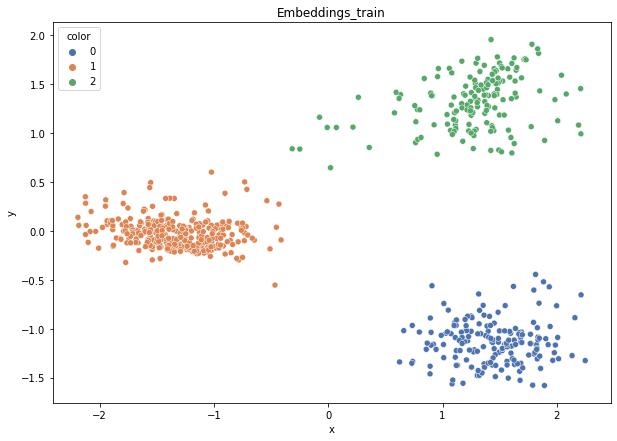

DT-f1-new-features: 0.986
DT-f1-old+new-features: 0.98
DT-f1-old-features: 0.906
DT-gmean-new-features: 0.988
DT-gmean-old+new-features: 0.984
DT-gmean-old-features: 0.904
KNN-f1-new-features: 1.0
KNN-f1-old+new-features: 0.994
KNN-f1-old-features: 0.9
KNN-gmean-new-features: 1.0
KNN-gmean-old+new-features: 0.996
KNN-gmean-old-features: 0.908
RF24-f1-new-features: 0.992
RF24-f1-old+new-features: 0.992
RF24-f1-old-features: 0.958
RF24-gmean-new-features: 0.992
RF24-gmean-old+new-features: 0.992
RF24-gmean-old-features: 0.968
new_yeast


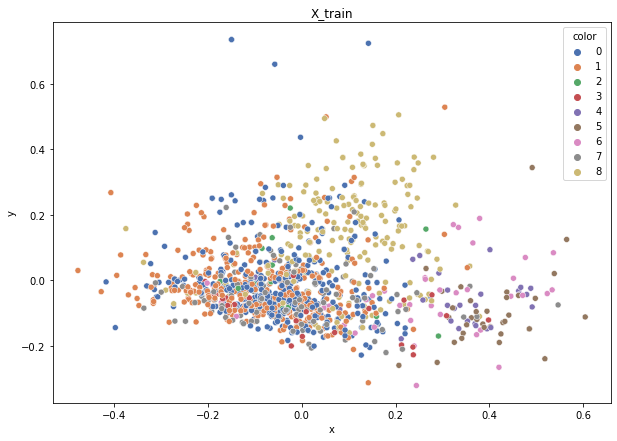

Class cardinalities: Counter({0: 371, 1: 343, 8: 195, 7: 134, 6: 41, 5: 35, 4: 28, 3: 24, 2: 16})
Weights: {1: 0.013814401543936261, 8: 0.02429917810035968, 0: 0.012771805200997676, 5: 0.13538113513057534, 6: 0.11556926169683263, 7: 0.035360744250523414, 3: 0.1974308220654224, 4: 0.16922641891321918, 2: 0.2961462330981336}


100%|██████████| 297/297 [00:00<00:00, 2805.57it/s]


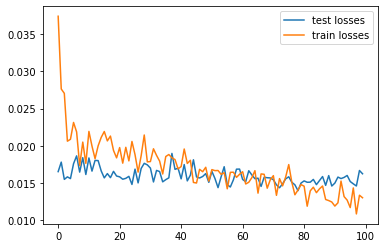

{'rare-1': 0.04851752021563342, 'borderline-8': 0.0444743935309973, 'outlier-0': 0.02628032345013477, 'safe-8': 0.06266846361185983, 'outlier-1': 0.03099730458221024, 'rare-0': 0.057951482479784364, 'rare-8': 0.02628032345013477, 'borderline-1': 0.13814016172506738, 'safe-0': 0.06940700808625337, 'borderline-0': 0.158355795148248, 'safe-5': 0.01752021563342318, 'borderline-5': 0.007412398921832884, 'outlier-8': 0.03099730458221024, 'borderline-6': 0.009433962264150943, 'safe-6': 0.006064690026954178, 'safe-7': 0.06805929919137467, 'outlier-3': 0.013477088948787063, 'outlier-6': 0.012803234501347708, 'outlier-4': 0.0047169811320754715, 'outlier-7': 0.00876010781671159, 'rare-4': 0.004043126684636119, 'borderline-4': 0.006064690026954178, 'safe-1': 0.07142857142857142, 'borderline-2': 0.0013477088948787063, 'rare-7': 0.005390835579514825, 'borderline-7': 0.03099730458221024, 'safe-2': 0.006064690026954178, 'rare-3': 0.005390835579514825, 'safe-4': 0.00876010781671159, 'rare-6': 0.0060646

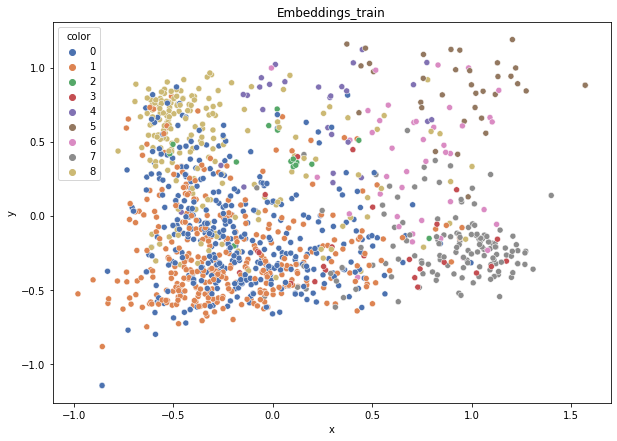

DT-f1-new-features: 0.428
DT-f1-old+new-features: 0.458
DT-f1-old-features: 0.451
DT-gmean-new-features: 0.255
DT-gmean-old+new-features: 0.274
DT-gmean-old-features: 0.26
KNN-f1-new-features: 0.454
KNN-f1-old+new-features: 0.514
KNN-f1-old-features: 0.494
KNN-gmean-new-features: 0.236
KNN-gmean-old+new-features: 0.28
KNN-gmean-old-features: 0.268
RF24-f1-new-features: 0.604
RF24-f1-old+new-features: 0.604
RF24-f1-old-features: 0.612
RF24-gmean-new-features: 0.327
RF24-gmean-old+new-features: 0.325
RF24-gmean-old-features: 0.332
1czysty-cut


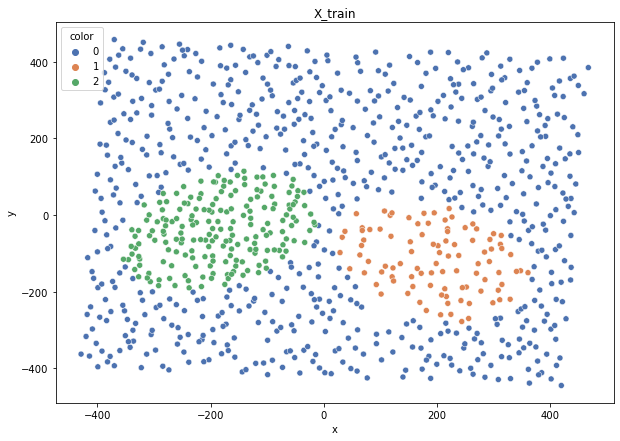

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 2749.18it/s]


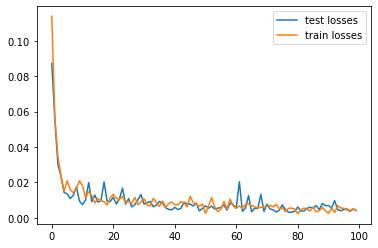

{'safe-1': 0.09666666666666666, 'safe-0': 0.6916666666666667, 'borderline-0': 0.005833333333333334, 'outlier-0': 0.0008333333333333334, 'rare-0': 0.0016666666666666668, 'safe-2': 0.19833333333333333, 'borderline-2': 0.0016666666666666668, 'borderline-1': 0.0016666666666666668, 'rare-1': 0.0016666666666666668}
{'safe-1': 0.08666666666666667, 'borderline-1': 0.013333333333333334, 'safe-0': 0.665, 'rare-0': 0.0075, 'borderline-0': 0.0275, 'safe-2': 0.19, 'borderline-2': 0.01}


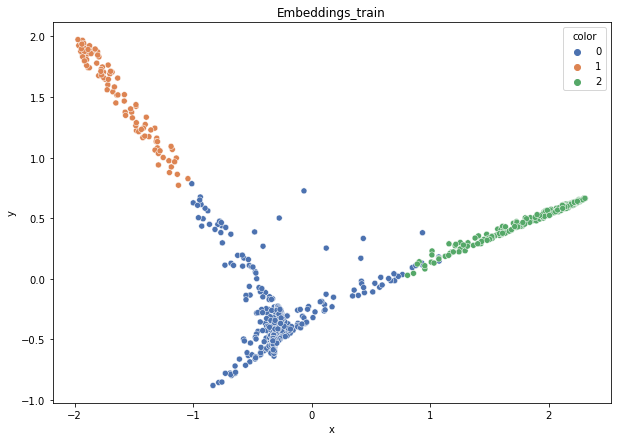

DT-f1-new-features: 0.975
DT-f1-old+new-features: 0.975
DT-f1-old-features: 0.929
DT-gmean-new-features: 0.956
DT-gmean-old+new-features: 0.956
DT-gmean-old-features: 0.928
KNN-f1-new-features: 0.961
KNN-f1-old+new-features: 0.975
KNN-f1-old-features: 0.945
KNN-gmean-new-features: 0.934
KNN-gmean-old+new-features: 0.956
KNN-gmean-old-features: 0.934
RF24-f1-new-features: 0.961
RF24-f1-old+new-features: 0.961
RF24-f1-old-features: 0.901
RF24-gmean-new-features: 0.939
RF24-gmean-old+new-features: 0.939
RF24-gmean-old-features: 0.906
2delikatne-cut


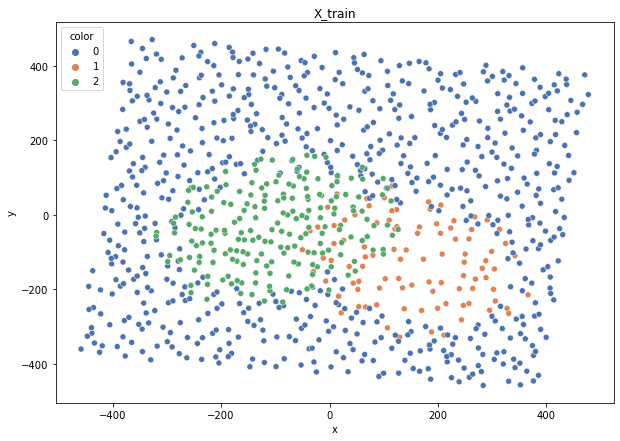

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 2889.34it/s]


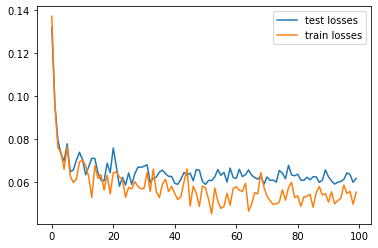

{'outlier-1': 0.0075, 'borderline-1': 0.025833333333333333, 'rare-1': 0.02, 'safe-1': 0.04666666666666667, 'safe-0': 0.6183333333333333, 'borderline-0': 0.06416666666666666, 'rare-0': 0.015833333333333335, 'outlier-0': 0.0016666666666666668, 'outlier-2': 0.0025, 'borderline-2': 0.055, 'rare-2': 0.015833333333333335, 'safe-2': 0.12666666666666668}
{'outlier-1': 0.0125, 'rare-1': 0.021666666666666667, 'borderline-1': 0.028333333333333332, 'safe-1': 0.0375, 'safe-0': 0.6075, 'borderline-0': 0.07916666666666666, 'rare-0': 0.010833333333333334, 'outlier-0': 0.0025, 'outlier-2': 0.004166666666666667, 'borderline-2': 0.07, 'rare-2': 0.0175, 'safe-2': 0.10833333333333334}


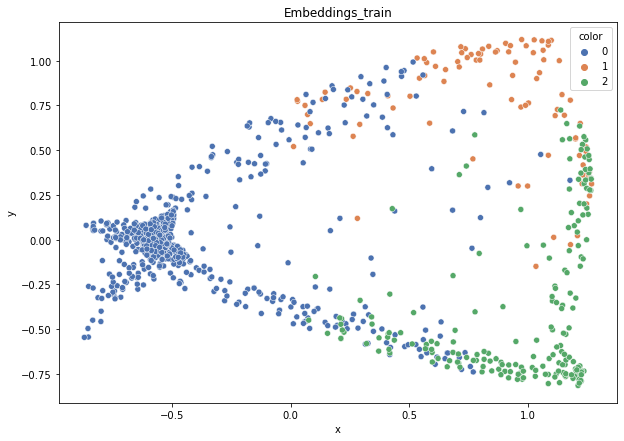

DT-f1-new-features: 0.792
DT-f1-old+new-features: 0.814
DT-f1-old-features: 0.763
DT-gmean-new-features: 0.818
DT-gmean-old+new-features: 0.831
DT-gmean-old-features: 0.787
KNN-f1-new-features: 0.793
KNN-f1-old+new-features: 0.764
KNN-f1-old-features: 0.742
KNN-gmean-new-features: 0.801
KNN-gmean-old+new-features: 0.768
KNN-gmean-old-features: 0.727
RF24-f1-new-features: 0.812
RF24-f1-old+new-features: 0.817
RF24-f1-old-features: 0.776
RF24-gmean-new-features: 0.837
RF24-gmean-old+new-features: 0.847
RF24-gmean-old-features: 0.776
3mocniej-cut


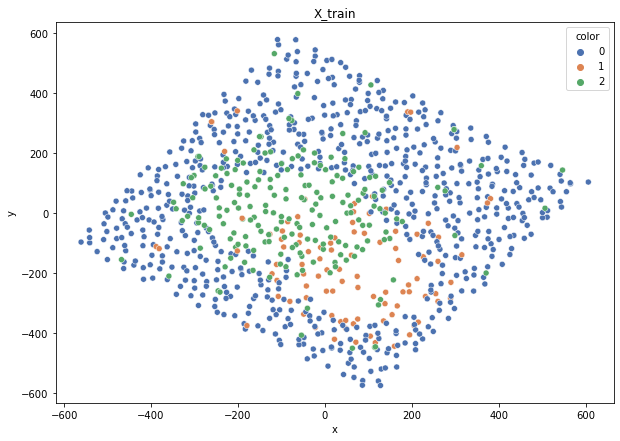

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 2888.46it/s]


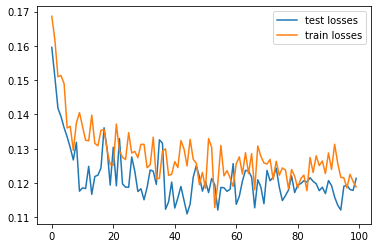

{'rare-1': 0.03833333333333333, 'outlier-1': 0.018333333333333333, 'borderline-1': 0.0275, 'safe-1': 0.015833333333333335, 'safe-0': 0.5258333333333334, 'borderline-0': 0.15833333333333333, 'rare-0': 0.011666666666666667, 'outlier-0': 0.004166666666666667, 'borderline-2': 0.0825, 'safe-2': 0.05416666666666667, 'rare-2': 0.043333333333333335, 'outlier-2': 0.02}
{'outlier-1': 0.025, 'borderline-1': 0.025833333333333333, 'rare-1': 0.035, 'safe-1': 0.014166666666666666, 'safe-0': 0.5058333333333334, 'borderline-0': 0.18666666666666668, 'rare-0': 0.006666666666666667, 'outlier-0': 0.0008333333333333334, 'borderline-2': 0.08, 'rare-2': 0.0525, 'outlier-2': 0.02, 'safe-2': 0.0475}


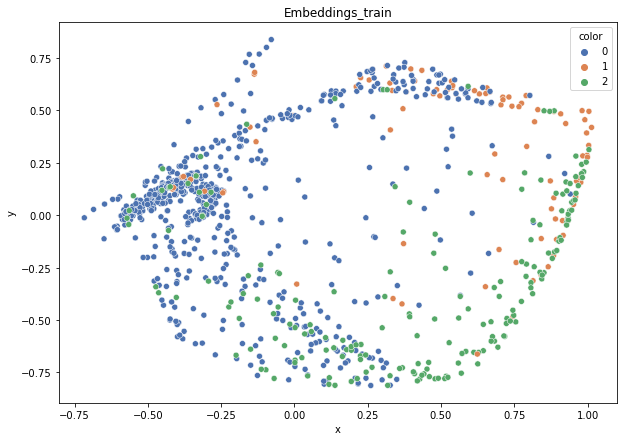

DT-f1-new-features: 0.629
DT-f1-old+new-features: 0.639
DT-f1-old-features: 0.531
DT-gmean-new-features: 0.653
DT-gmean-old+new-features: 0.645
DT-gmean-old-features: 0.547
KNN-f1-new-features: 0.584
KNN-f1-old+new-features: 0.565
KNN-f1-old-features: 0.536
KNN-gmean-new-features: 0.519
KNN-gmean-old+new-features: 0.512
KNN-gmean-old-features: 0.479
RF24-f1-new-features: 0.635
RF24-f1-old+new-features: 0.626
RF24-f1-old-features: 0.581
RF24-gmean-new-features: 0.582
RF24-gmean-old+new-features: 0.586
RF24-gmean-old-features: 0.551
4delikatne-bezover-cut


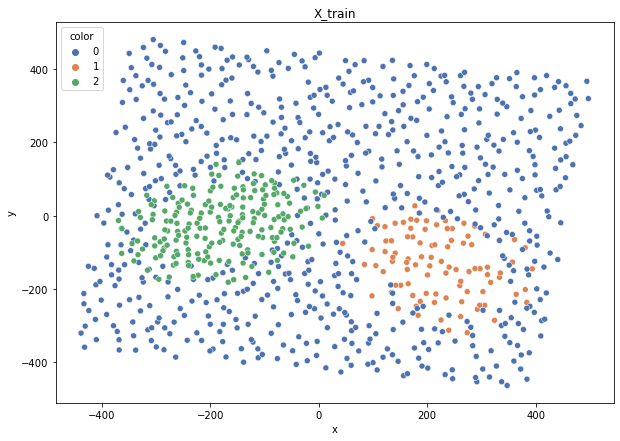

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 2973.93it/s]


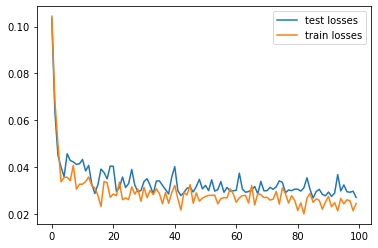

{'borderline-1': 0.020833333333333332, 'rare-1': 0.008333333333333333, 'outlier-1': 0.0033333333333333335, 'safe-1': 0.0675, 'borderline-0': 0.060833333333333336, 'safe-0': 0.6216666666666667, 'rare-0': 0.013333333333333334, 'outlier-0': 0.004166666666666667, 'safe-2': 0.15083333333333335, 'borderline-2': 0.0375, 'rare-2': 0.006666666666666667, 'outlier-2': 0.005}
{'outlier-1': 0.01, 'rare-1': 0.01, 'borderline-1': 0.024166666666666666, 'safe-1': 0.05583333333333333, 'borderline-0': 0.0925, 'safe-0': 0.5841666666666666, 'outlier-0': 0.004166666666666667, 'rare-0': 0.019166666666666665, 'borderline-2': 0.045, 'safe-2': 0.13833333333333334, 'rare-2': 0.014166666666666666, 'outlier-2': 0.0025}


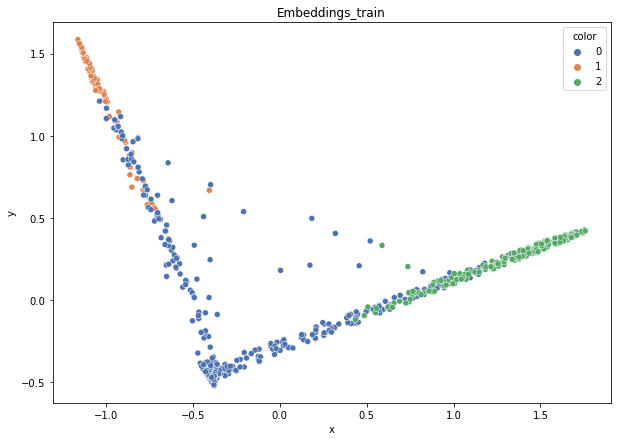

DT-f1-new-features: 0.808
DT-f1-old+new-features: 0.833
DT-f1-old-features: 0.761
DT-gmean-new-features: 0.811
DT-gmean-old+new-features: 0.844
DT-gmean-old-features: 0.769
KNN-f1-new-features: 0.816
KNN-f1-old+new-features: 0.792
KNN-f1-old-features: 0.767
KNN-gmean-new-features: 0.797
KNN-gmean-old+new-features: 0.779
KNN-gmean-old-features: 0.776
RF24-f1-new-features: 0.832
RF24-f1-old+new-features: 0.833
RF24-f1-old-features: 0.826
RF24-gmean-new-features: 0.832
RF24-gmean-old+new-features: 0.837
RF24-gmean-old-features: 0.845
balance-scale


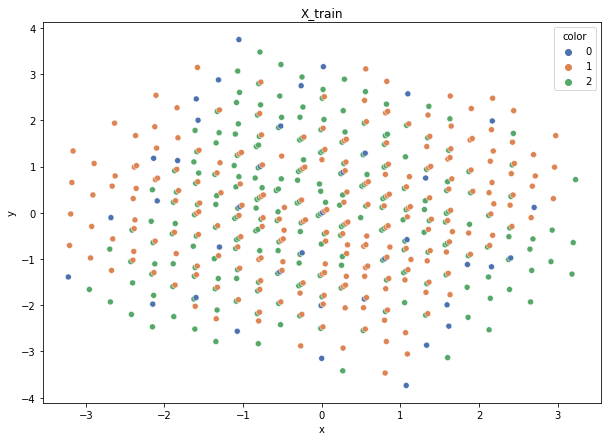

Class cardinalities: Counter({1: 231, 2: 230, 0: 39})
Weights: {0: 0.7471628063958148, 2: 0.1266928236932034, 1: 0.12614436991098174}


100%|██████████| 125/125 [00:00<00:00, 2776.52it/s]


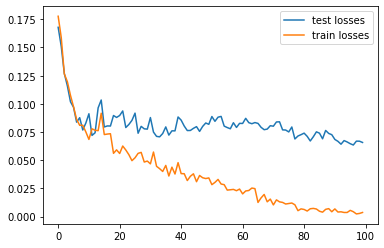

{'safe-0': 0.0704, 'safe-2': 0.456, 'safe-1': 0.4464, 'borderline-1': 0.008, 'rare-2': 0.0016, 'outlier-2': 0.0032, 'borderline-0': 0.0064, 'rare-0': 0.0016, 'rare-1': 0.0048, 'outlier-1': 0.0016}
{'outlier-0': 0.0752, 'rare-2': 0.0576, 'safe-2': 0.0992, 'borderline-2': 0.296, 'borderline-1': 0.3056, 'safe-1': 0.0896, 'outlier-2': 0.008, 'outlier-1': 0.008, 'rare-1': 0.0576, 'rare-0': 0.0032}


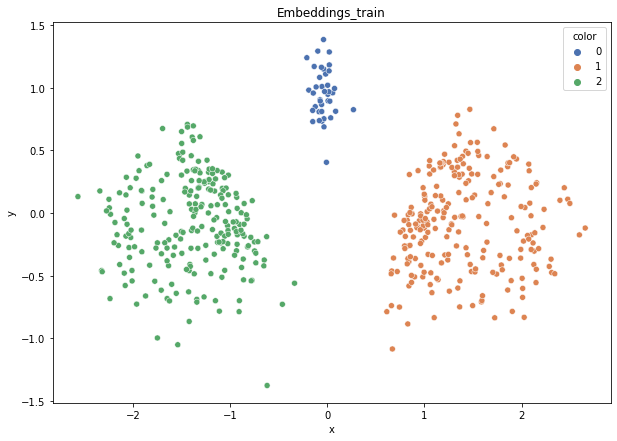

DT-f1-new-features: 0.839
DT-f1-old+new-features: 0.839
DT-f1-old-features: 0.638
DT-gmean-new-features: 0.839
DT-gmean-old+new-features: 0.839
DT-gmean-old-features: 0.585
KNN-f1-new-features: 0.868
KNN-f1-old+new-features: 0.748
KNN-f1-old-features: 0.545
KNN-gmean-new-features: 0.914
KNN-gmean-old+new-features: 0.698
KNN-gmean-old-features: 0.088
RF24-f1-new-features: 0.881
RF24-f1-old+new-features: 0.858
RF24-f1-old-features: 0.591
RF24-gmean-new-features: 0.92
RF24-gmean-old+new-features: 0.78
RF24-gmean-old-features: 0.092
cleveland


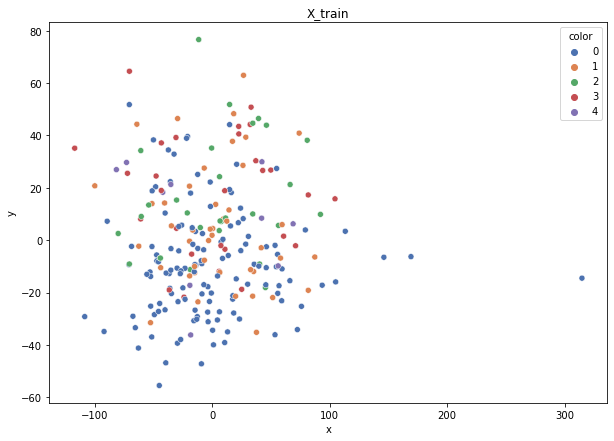

Class cardinalities: Counter({0: 131, 1: 44, 2: 29, 3: 28, 4: 10})
Weights: {0: 0.03806176471590889, 2: 0.1719341785442781, 1: 0.11332025404054694, 3: 0.17807468492085946, 4: 0.4986091177784065}


100%|██████████| 61/61 [00:00<00:00, 2865.64it/s]


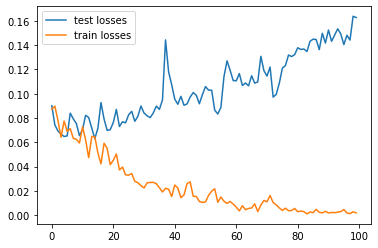

{'safe-0': 0.47854785478547857, 'safe-2': 0.10231023102310231, 'borderline-1': 0.04950495049504951, 'safe-1': 0.10891089108910891, 'safe-3': 0.0891089108910891, 'safe-4': 0.033003300330033, 'outlier-0': 0.0231023102310231, 'borderline-3': 0.013201320132013201, 'rare-1': 0.009900990099009901, 'borderline-0': 0.033003300330033, 'rare-0': 0.006600660066006601, 'outlier-1': 0.013201320132013201, 'outlier-4': 0.009900990099009901, 'outlier-2': 0.0165016501650165, 'outlier-3': 0.013201320132013201}
{'borderline-0': 0.10561056105610561, 'outlier-2': 0.0297029702970297, 'rare-1': 0.07260726072607261, 'safe-0': 0.39603960396039606, 'rare-0': 0.033003300330033, 'borderline-2': 0.0165016501650165, 'rare-2': 0.07260726072607261, 'outlier-1': 0.0297029702970297, 'rare-3': 0.0462046204620462, 'outlier-4': 0.033003300330033, 'borderline-3': 0.033003300330033, 'outlier-3': 0.036303630363036306, 'borderline-1': 0.07590759075907591, 'outlier-0': 0.006600660066006601, 'rare-4': 0.009900990099009901, 'saf

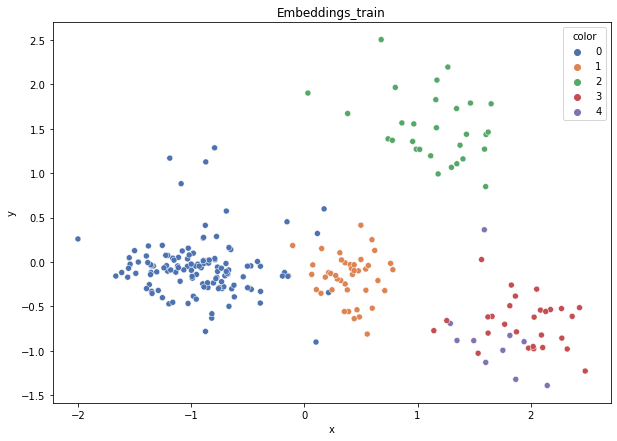

DT-f1-new-features: 0.454
DT-f1-old+new-features: 0.462
DT-f1-old-features: 0.281
DT-gmean-new-features: 0.438
DT-gmean-old+new-features: 0.455
DT-gmean-old-features: 0.101
KNN-f1-new-features: 0.355
KNN-f1-old+new-features: 0.333
KNN-f1-old-features: 0.356
KNN-gmean-new-features: 0.128
KNN-gmean-old+new-features: 0.124
KNN-gmean-old-features: 0.122
RF24-f1-new-features: 0.44
RF24-f1-old+new-features: 0.33
RF24-f1-old-features: 0.307
RF24-gmean-new-features: 0.404
RF24-gmean-old+new-features: 0.116
RF24-gmean-old-features: 0.093
cleveland_v2


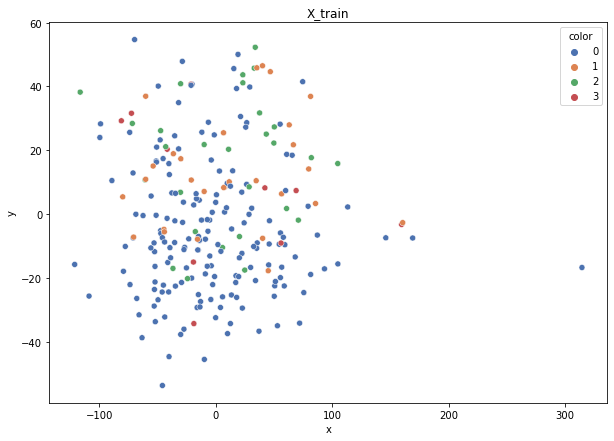

Class cardinalities: Counter({0: 175, 1: 29, 2: 28, 3: 10})
Weights: {0: 0.032483898067768135, 1: 0.19602352282273874, 2: 0.20302436292355083, 3: 0.5684682161859423}


100%|██████████| 61/61 [00:00<00:00, 2934.16it/s]


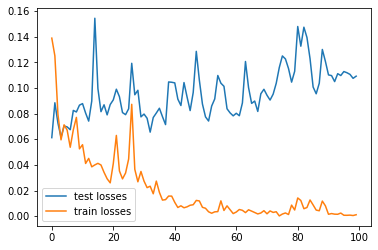

{'safe-0': 0.6765676567656765, 'rare-1': 0.009900990099009901, 'safe-2': 0.0924092409240924, 'safe-1': 0.066006600660066, 'safe-3': 0.033003300330033, 'rare-0': 0.019801980198019802, 'borderline-1': 0.026402640264026403, 'borderline-0': 0.019801980198019802, 'borderline-2': 0.0033003300330033004, 'outlier-0': 0.006600660066006601, 'rare-2': 0.009900990099009901, 'outlier-1': 0.0165016501650165, 'outlier-3': 0.006600660066006601, 'outlier-2': 0.009900990099009901, 'rare-3': 0.0033003300330033004}
{'borderline-0': 0.08250825082508251, 'outlier-1': 0.0297029702970297, 'safe-0': 0.6138613861386139, 'rare-2': 0.04950495049504951, 'rare-1': 0.07260726072607261, 'outlier-3': 0.033003300330033, 'borderline-2': 0.033003300330033, 'rare-3': 0.009900990099009901, 'rare-0': 0.026402640264026403, 'outlier-2': 0.033003300330033, 'borderline-1': 0.0165016501650165}


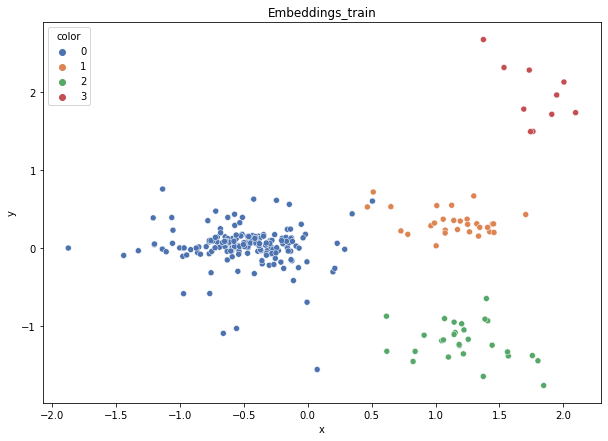

DT-f1-new-features: 0.283
DT-f1-old+new-features: 0.288
DT-f1-old-features: 0.484
DT-gmean-new-features: 0.073
DT-gmean-old+new-features: 0.074
DT-gmean-old-features: 0.546
KNN-f1-new-features: 0.288
KNN-f1-old+new-features: 0.356
KNN-f1-old-features: 0.39
KNN-gmean-new-features: 0.074
KNN-gmean-old+new-features: 0.091
KNN-gmean-old-features: 0.11
RF24-f1-new-features: 0.293
RF24-f1-old+new-features: 0.293
RF24-f1-old-features: 0.346
RF24-gmean-new-features: 0.075
RF24-gmean-old+new-features: 0.075
RF24-gmean-old-features: 0.085
glass


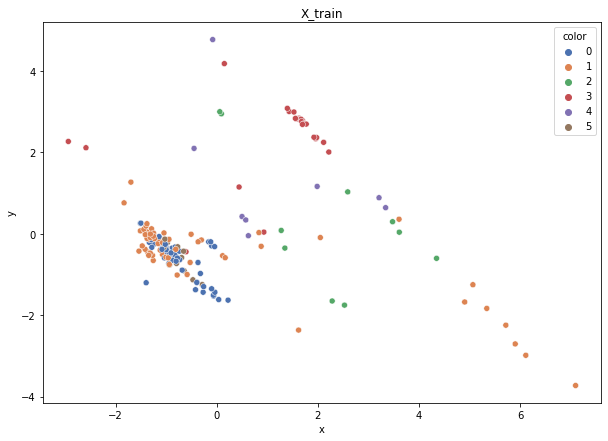

Class cardinalities: Counter({1: 60, 0: 56, 3: 24, 5: 13, 2: 10, 4: 8})
Weights: {5: 0.2034390893678857, 4: 0.33058852022281426, 1: 0.0440784693630419, 0: 0.047226931460402036, 3: 0.11019617340760475, 2: 0.2644708161782514}


100%|██████████| 43/43 [00:00<00:00, 2685.73it/s]


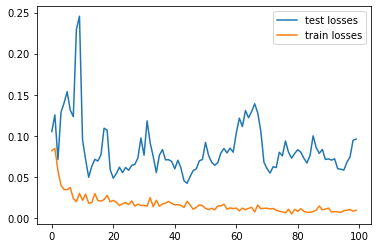

{'borderline-5': 0.04672897196261682, 'safe-4': 0.037383177570093455, 'safe-1': 0.205607476635514, 'borderline-1': 0.09813084112149532, 'safe-0': 0.19158878504672897, 'safe-3': 0.1308411214953271, 'outlier-1': 0.02336448598130841, 'safe-5': 0.028037383177570093, 'safe-2': 0.04672897196261682, 'rare-1': 0.028037383177570093, 'rare-0': 0.018691588785046728, 'borderline-0': 0.09813084112149532, 'outlier-0': 0.018691588785046728, 'outlier-2': 0.014018691588785047, 'rare-5': 0.004672897196261682, 'borderline-4': 0.004672897196261682, 'outlier-3': 0.004672897196261682}
{'outlier-5': 0.02336448598130841, 'outlier-4': 0.004672897196261682, 'safe-1': 0.16355140186915887, 'borderline-1': 0.12149532710280374, 'rare-5': 0.037383177570093455, 'safe-0': 0.18691588785046728, 'safe-3': 0.102803738317757, 'borderline-2': 0.028037383177570093, 'outlier-1': 0.014018691588785047, 'rare-1': 0.056074766355140186, 'rare-0': 0.018691588785046728, 'rare-2': 0.014018691588785047, 'borderline-5': 0.0186915887850

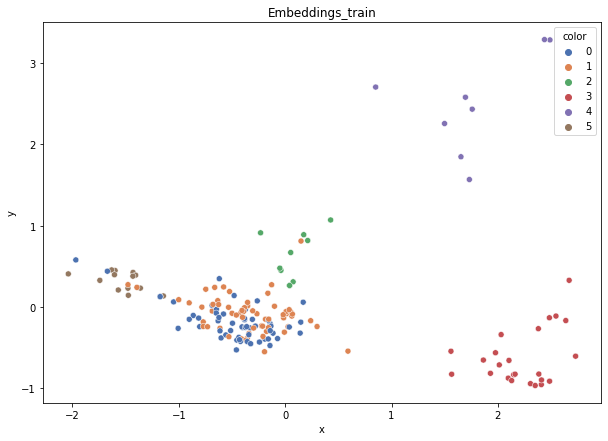

DT-f1-new-features: 0.4
DT-f1-old+new-features: 0.421
DT-f1-old-features: 0.53
DT-gmean-new-features: 0.066
DT-gmean-old+new-features: 0.069
DT-gmean-old-features: 0.232
KNN-f1-new-features: 0.63
KNN-f1-old+new-features: 0.702
KNN-f1-old-features: 0.568
KNN-gmean-new-features: 0.265
KNN-gmean-old+new-features: 0.681
KNN-gmean-old-features: 0.557
RF24-f1-new-features: 0.547
RF24-f1-old+new-features: 0.557
RF24-f1-old-features: 0.652
RF24-gmean-new-features: 0.221
RF24-gmean-old+new-features: 0.224
RF24-gmean-old-features: 0.279
new_ecoli


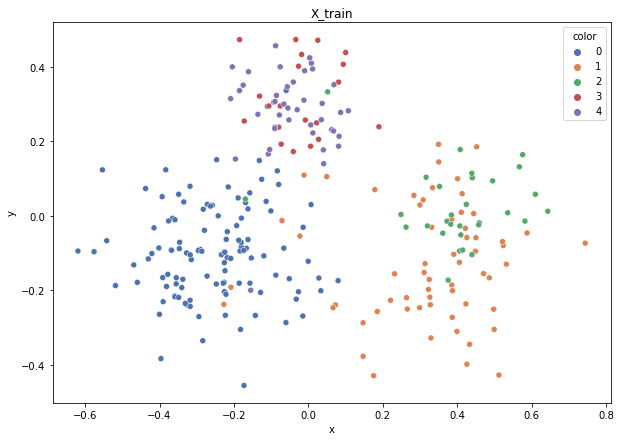

Class cardinalities: Counter({0: 116, 1: 61, 4: 42, 2: 30, 3: 20})
Weights: {0: 0.06523067522150933, 1: 0.12404521845401774, 2: 0.25222527752316937, 3: 0.3783379162847541, 4: 0.18016091251654956}


100%|██████████| 67/67 [00:00<00:00, 2911.62it/s]


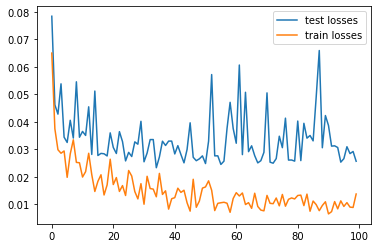

{'safe-0': 0.41369047619047616, 'borderline-0': 0.008928571428571428, 'outlier-0': 0.005952380952380952, 'safe-1': 0.16964285714285715, 'outlier-1': 0.002976190476190476, 'rare-1': 0.017857142857142856, 'borderline-1': 0.03869047619047619, 'safe-2': 0.05952380952380952, 'borderline-2': 0.041666666666666664, 'outlier-2': 0.005952380952380952, 'rare-2': 0.002976190476190476, 'safe-3': 0.07142857142857142, 'safe-4': 0.125, 'borderline-4': 0.017857142857142856, 'outlier-4': 0.011904761904761904, 'rare-0': 0.002976190476190476, 'outlier-3': 0.002976190476190476}
{'safe-0': 0.4107142857142857, 'borderline-0': 0.008928571428571428, 'outlier-0': 0.008928571428571428, 'safe-1': 0.11904761904761904, 'outlier-1': 0.01488095238095238, 'borderline-1': 0.07738095238095238, 'rare-1': 0.017857142857142856, 'outlier-2': 0.017857142857142856, 'borderline-2': 0.05952380952380952, 'safe-2': 0.026785714285714284, 'rare-2': 0.005952380952380952, 'safe-3': 0.05654761904761905, 'borderline-3': 0.0119047619047

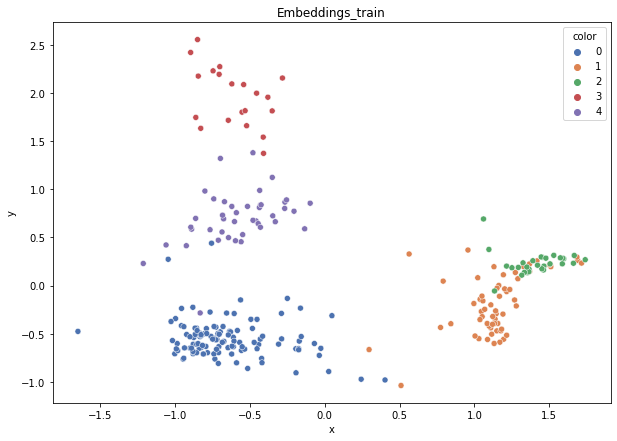

DT-f1-new-features: 0.841
DT-f1-old+new-features: 0.859
DT-f1-old-features: 0.707
DT-gmean-new-features: 0.829
DT-gmean-old+new-features: 0.84
DT-gmean-old-features: 0.688
KNN-f1-new-features: 0.853
KNN-f1-old+new-features: 0.733
KNN-f1-old-features: 0.728
KNN-gmean-new-features: 0.835
KNN-gmean-old+new-features: 0.713
KNN-gmean-old-features: 0.709
RF24-f1-new-features: 0.824
RF24-f1-old+new-features: 0.841
RF24-f1-old-features: 0.841
RF24-gmean-new-features: 0.817
RF24-gmean-old+new-features: 0.829
RF24-gmean-old-features: 0.829
new_led7digit


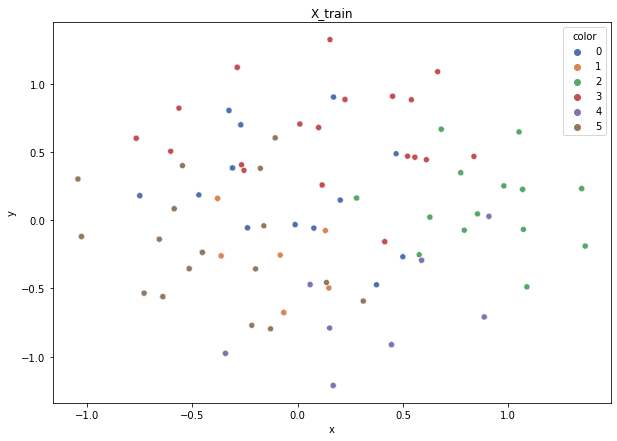

Class cardinalities: Counter({3: 87, 5: 80, 0: 78, 2: 75, 4: 41, 1: 39})
Weights: {0: 0.1279755802357915, 2: 0.13309460344522317, 3: 0.114736727107951, 4: 0.2434657380095546, 5: 0.12477619072989674, 1: 0.255951160471583}


100%|██████████| 100/100 [00:00<00:00, 2866.53it/s]


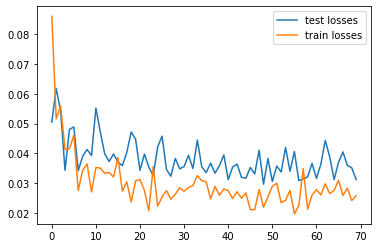

{'borderline-0': 0.034, 'safe-0': 0.144, 'safe-2': 0.152, 'borderline-2': 0.024, 'safe-3': 0.158, 'outlier-3': 0.008, 'safe-4': 0.076, 'borderline-4': 0.024, 'safe-5': 0.14, 'borderline-5': 0.042, 'outlier-1': 0.02, 'borderline-1': 0.074, 'rare-3': 0.016, 'borderline-3': 0.034, 'outlier-5': 0.014, 'rare-1': 0.004, 'rare-0': 0.01, 'outlier-2': 0.006, 'outlier-0': 0.008, 'rare-2': 0.006, 'rare-5': 0.002, 'rare-4': 0.004}
{'borderline-0': 0.048, 'safe-0': 0.122, 'safe-2': 0.144, 'borderline-2': 0.03, 'safe-3': 0.144, 'borderline-3': 0.044, 'outlier-3': 0.008, 'safe-4': 0.08, 'borderline-4': 0.014, 'borderline-5': 0.03, 'safe-5': 0.15, 'outlier-0': 0.01, 'outlier-1': 0.014, 'borderline-1': 0.064, 'rare-4': 0.01, 'outlier-5': 0.01, 'rare-0': 0.016, 'rare-1': 0.02, 'rare-2': 0.006, 'rare-3': 0.02, 'outlier-2': 0.008, 'rare-5': 0.008}


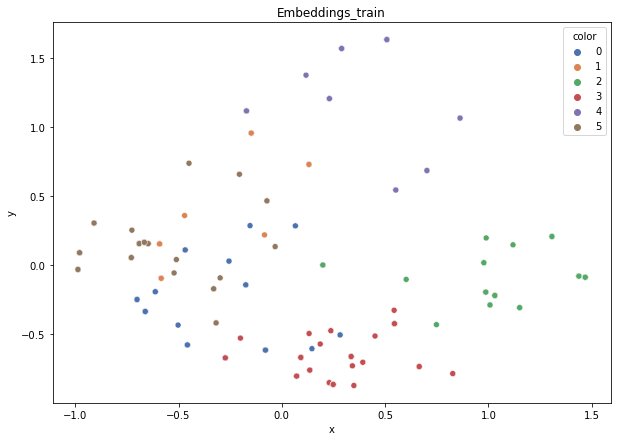

DT-f1-new-features: 0.748
DT-f1-old+new-features: 0.748
DT-f1-old-features: 0.779
DT-gmean-new-features: 0.72
DT-gmean-old+new-features: 0.72
DT-gmean-old-features: 0.755
KNN-f1-new-features: 0.78
KNN-f1-old+new-features: 0.649
KNN-f1-old-features: 0.692
KNN-gmean-new-features: 0.756
KNN-gmean-old+new-features: 0.268
KNN-gmean-old-features: 0.283
RF24-f1-new-features: 0.771
RF24-f1-old+new-features: 0.758
RF24-f1-old-features: 0.767
RF24-gmean-new-features: 0.742
RF24-gmean-old+new-features: 0.728
RF24-gmean-old-features: 0.735
new_winequality-red


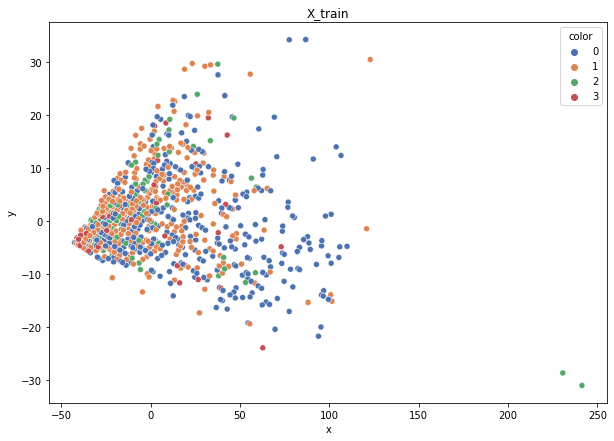

Class cardinalities: Counter({0: 545, 1: 510, 2: 159, 3: 65})
Weights: {0: 0.072041356277607, 1: 0.07698537092410943, 2: 0.24693420862450194, 3: 0.6040390641737817}


100%|██████████| 320/320 [00:00<00:00, 2797.08it/s]


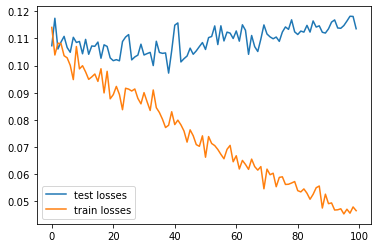

{'safe-0': 0.2176360225140713, 'borderline-0': 0.14696685428392744, 'borderline-1': 0.18449030644152595, 'rare-2': 0.021888680425265792, 'outlier-2': 0.01938711694809256, 'safe-3': 0.013133208255159476, 'safe-1': 0.1432145090681676, 'rare-0': 0.039399624765478425, 'outlier-1': 0.020637898686679174, 'outlier-0': 0.021888680425265792, 'outlier-3': 0.013133208255159476, 'rare-1': 0.05065666041275797, 'borderline-3': 0.017510944340212633, 'rare-3': 0.0068792995622263915, 'safe-2': 0.05128205128205128, 'borderline-2': 0.03189493433395872}
{'safe-0': 0.18261413383364603, 'rare-1': 0.06441525953721075, 'borderline-0': 0.1651031894934334, 'outlier-2': 0.016885553470919325, 'rare-0': 0.05065666041275797, 'outlier-3': 0.031269543464665414, 'borderline-1': 0.20200125078173858, 'outlier-1': 0.023139462163852407, 'outlier-0': 0.027517198248905566, 'safe-1': 0.10944340212632896, 'rare-3': 0.013758599124452783, 'borderline-3': 0.0050031269543464665, 'rare-2': 0.03877423389618512, 'borderline-2': 0.04

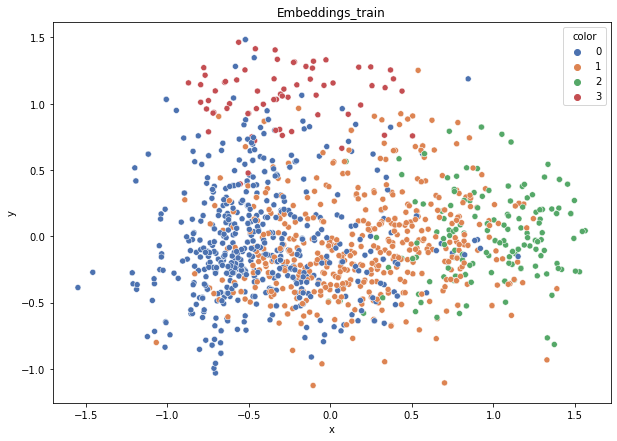

DT-f1-new-features: 0.51
DT-f1-old+new-features: 0.567
DT-f1-old-features: 0.505
DT-gmean-new-features: 0.458
DT-gmean-old+new-features: 0.499
DT-gmean-old-features: 0.48
KNN-f1-new-features: 0.528
KNN-f1-old+new-features: 0.579
KNN-f1-old-features: 0.555
KNN-gmean-new-features: 0.459
KNN-gmean-old+new-features: 0.539
KNN-gmean-old-features: 0.512
RF24-f1-new-features: 0.54
RF24-f1-old+new-features: 0.531
RF24-f1-old-features: 0.558
RF24-gmean-new-features: 0.437
RF24-gmean-old+new-features: 0.462
RF24-gmean-old-features: 0.439
thyroid-newthyroid


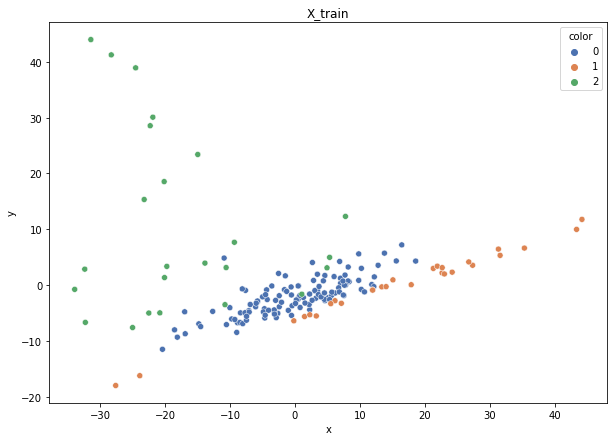

Class cardinalities: Counter({0: 120, 1: 28, 2: 24})
Weights: {0: 0.09722222222222222, 1: 0.41666666666666663, 2: 0.4861111111111111}


100%|██████████| 43/43 [00:00<00:00, 2630.12it/s]


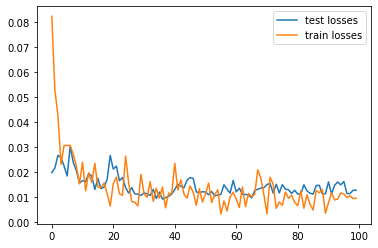

{'safe-0': 0.6883720930232559, 'borderline-0': 0.009302325581395349, 'safe-1': 0.15813953488372093, 'safe-2': 0.13488372093023257, 'borderline-2': 0.004651162790697674, 'rare-1': 0.004651162790697674}
{'safe-0': 0.6744186046511628, 'borderline-0': 0.023255813953488372, 'borderline-1': 0.05116279069767442, 'safe-1': 0.11162790697674418, 'safe-2': 0.10232558139534884, 'outlier-2': 0.009302325581395349, 'borderline-2': 0.013953488372093023, 'rare-2': 0.013953488372093023}


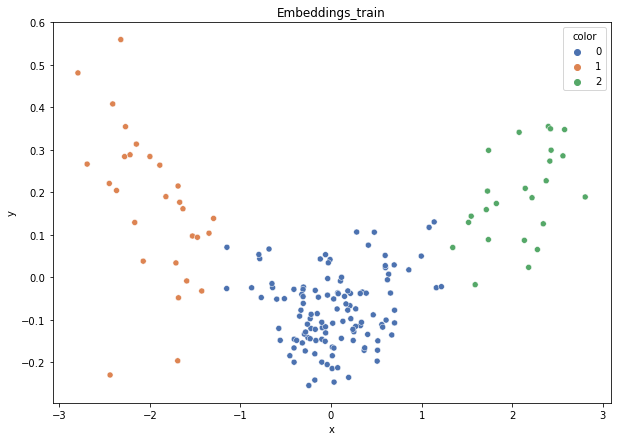

DT-f1-new-features: 0.969
DT-f1-old+new-features: 0.969
DT-f1-old-features: 0.947
DT-gmean-new-features: 0.95
DT-gmean-old+new-features: 0.95
DT-gmean-old-features: 0.977
KNN-f1-new-features: 0.969
KNN-f1-old+new-features: 1.0
KNN-f1-old-features: 0.972
KNN-gmean-new-features: 0.95
KNN-gmean-old+new-features: 1.0
KNN-gmean-old-features: 0.989
RF24-f1-new-features: 0.969
RF24-f1-old+new-features: 0.969
RF24-f1-old-features: 0.969
RF24-gmean-new-features: 0.95
RF24-gmean-old+new-features: 0.95
RF24-gmean-old-features: 0.95


In [73]:
result_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
        
    for train_index, test_index in list(skf.split(X, y))[1:2]:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]
        
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)
        
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        embeddings_all = np.vstack([embeddings_train,embeddings_test])
        y_all = np.hstack([y_train, y_test])
        
        s_dict = calc_mean_minority_safety5(embeddings_all, y_all, dataset_name)
        for k, v in s_dict.items():
            safety_dict[f"emb-{k}"].append(v)
            
        s_dict = calc_mean_minority_safety5(np.vstack([X_train_enc, X_test_enc]), y_all, dataset_name)
        for k,v in s_dict.items():
            safety_dict[f"raw-{k}"].append(v)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train_norm, embeddings_train])
        X_test_new = np.hstack([X_test_norm, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_norm, y_train)
            preds = clf.predict(X_test_norm)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            result_dict[f"{clf_name}-f1-old-features"].append(f1)
            result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            result_dict[f"{clf_name}-f1-new-features"].append(f1)
            result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(result_dict.keys())):
            print(f"{key}: {np.round(result_dict[key][-1],3)}")

In [74]:
results_df = pd.DataFrame.from_dict(result_dict)

In [75]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [76]:
results_df

,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,KNN-f1-old+new-features,KNN-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features
0,0.508315,0.511638,0.491058,0.503418,0.443205,0.432965,0.502420,0.502668,0.467439,0.471206,0.448058,0.439731,0.514234,0.513806,0.463856,0.468240,0.431462,0.417092
1,0.983982,0.985603,0.954533,0.954580,0.951859,0.951213,0.936364,0.934655,0.890664,0.885313,0.926645,0.923182,0.910190,0.902863,0.912720,0.902863,0.925466,0.918858
2,0.846154,0.839533,0.871605,0.866633,0.643218,0.618573,0.897436,0.894608,0.897436,0.894608,0.820247,0.810560,0.897436,0.894608,0.897436,0.894608,0.896825,0.892137
3,0.958372,0.967978,0.905834,0.903785,0.899572,0.908396,0.991949,0.991596,0.980169,0.983849,0.993935,0.996109,0.991949,0.991596,0.985886,0.987738,1.000000,1.000000
4,0.611727,0.332123,0.451048,0.259650,0.493692,0.268293,0.604354,0.325150,0.457812,0.274312,0.513847,0.280367,0.603788,0.326641,0.427533,0.255214,0.454248,0.236027
5,0.901457,0.906352,0.929009,0.927780,0.944925,0.933507,0.961344,0.939165,0.974828,0.956466,0.974828,0.956466,0.961344,0.939165,0.974828,0.956466,0.961301,0.934455
6,0.775706,0.775607,0.763359,0.787034,0.741824,0.727377,0.816711,0.847067,0.813558,0.830636,0.763830,0.767659,0.812039,0.837411,0.791966,0.818034,0.792680,0.801208
7,0.580840,0.550799,0.531154,0.546657,0.536120,0.479337,0.625539,0.586084,0.639412,0.645494,0.564724,0.512473,0.634976,0.582421,0.628606,0.652721,0.583978,0.519396
8,0.825884,0.845250,0.761183,0.769140,0.766514,0.776397,0.832542,0.837411,0.832667,0.843816,0.792193,0.778960,0.831776,0.832340,0.808398,0.811329,0.816291,0.797391
9,0.591450,0.092305,0.638135,0.585157,0.544574,0.087648,0.857787,0.779856,0.838994,0.839374,0.748245,0.697862,0.881161,0.919959,0.838994,0.839374,0.868108,0.914350


In [77]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,emb-safe
0,0.031229
1,0.054645
2,0.193750
3,0.246454
4,0.007682
5,0.147500
6,0.086667
7,0.035000
8,0.109167
9,0.070400


In [78]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,raw-safe
0,0.028513
1,0.027322
2,0.125000
3,0.203310
4,0.005256
5,0.138333
6,0.072917
7,0.030833
8,0.097083
9,0.000000


In [79]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,emb-safe,raw-safe
0,0.031229,0.028513
1,0.054645,0.027322
2,0.193750,0.125000
3,0.246454,0.203310
4,0.007682,0.005256
5,0.147500,0.138333
6,0.086667,0.072917
7,0.035000,0.030833
8,0.109167,0.097083
9,0.070400,0.000000


In [80]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,0.508315,0.502420,0.514234
1,0.983982,0.936364,0.910190
2,0.846154,0.897436,0.897436
3,0.958372,0.991949,0.991949
4,0.611727,0.604354,0.603788
5,0.901457,0.961344,0.961344
6,0.775706,0.816711,0.812039
7,0.580840,0.625539,0.634976
8,0.825884,0.832542,0.831776
9,0.591450,0.857787,0.881161


In [81]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,0.511638,0.502668,0.513806
1,0.985603,0.934655,0.902863
2,0.839533,0.894608,0.894608
3,0.967978,0.991596,0.991596
4,0.332123,0.325150,0.326641
5,0.906352,0.939165,0.939165
6,0.775607,0.847067,0.837411
7,0.550799,0.586084,0.582421
8,0.845250,0.837411,0.832340
9,0.092305,0.779856,0.919959


In [82]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,0.491058,0.467439,0.463856
1,0.954533,0.890664,0.912720
2,0.871605,0.897436,0.897436
3,0.905834,0.980169,0.985886
4,0.451048,0.457812,0.427533
5,0.929009,0.974828,0.974828
6,0.763359,0.813558,0.791966
7,0.531154,0.639412,0.628606
8,0.761183,0.832667,0.808398
9,0.638135,0.838994,0.838994


In [83]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,0.503418,0.471206,0.468240
1,0.954580,0.885313,0.902863
2,0.866633,0.894608,0.894608
3,0.903785,0.983849,0.987738
4,0.259650,0.274312,0.255214
5,0.927780,0.956466,0.956466
6,0.787034,0.830636,0.818034
7,0.546657,0.645494,0.652721
8,0.769140,0.843816,0.811329
9,0.585157,0.839374,0.839374


In [84]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,0.443205,0.448058,0.431462
1,0.951859,0.926645,0.925466
2,0.643218,0.820247,0.896825
3,0.899572,0.993935,1.000000
4,0.493692,0.513847,0.454248
5,0.944925,0.974828,0.961301
6,0.741824,0.763830,0.792680
7,0.536120,0.564724,0.583978
8,0.766514,0.792193,0.816291
9,0.544574,0.748245,0.868108


In [85]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,0.432965,0.439731,0.417092
1,0.951213,0.923182,0.918858
2,0.618573,0.810560,0.892137
3,0.908396,0.996109,1.000000
4,0.268293,0.280367,0.236027
5,0.933507,0.956466,0.934455
6,0.727377,0.767659,0.801208
7,0.479337,0.512473,0.519396
8,0.776397,0.778960,0.797391
9,0.087648,0.697862,0.914350
